<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> MAC0209 - Modelagem e Simulação</a> </font>

Roberto M. Cesar Jr. (IME-USP)

Roberto Hirata Jr. (IME-USP)
***
<font size="5"> Random Methods e exercícios com a câmara de partículas</font>
***

## Exercício com a câmara de particulas da Figura 7.1 dos slides

Retome o experimento da câmara da Figura 7.1 explicada em aula. Você deve implementar a simulação da evolução do sistema usando algumas variações definidas abaixo. Em todos os exercícios, você deve assumir que existem $M$ partículas que são sorteadas usando as distribuições definidas abaixo. O sistema dinâmico é composto pelo conjunto de $M$ partículas. O estado de cada partícula é a câmara que ela se encontra. Por exemplo, no caso da figura, 0 para  a câmara da esquerda e 1 para a câmara da direita. Assim, o vetor de estados do sistema pode ser representado por um vetor binário de tamanho $M$.  

As simulações devem produzir as seguintes visualizações gráficas:

* Acumule o estado das partículas ao longo da simulação em uma matriz $E$ de tamanho $M \times N$, em que $M$ é o número de partículas e $N$ é o número de iterações da simulação. Cada coluna representa o estado do sistema dinâmico na i-ésima iteração. Visualize a matriz $E$ como uma imagem.

* Plote os gráficos $n_0(i)$ e $n_1(i)$ partículas em cada câmara 0 e 1 de $i$ iterações da simulação.


### Distribuição uniforme

Assuma que as partículas são sorteadas usando uma distribuição uniforme sobre  todas.

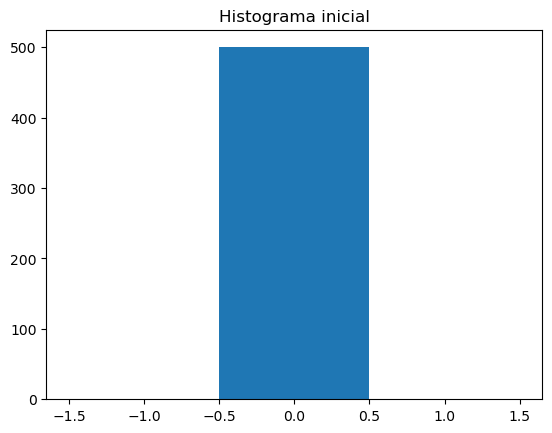

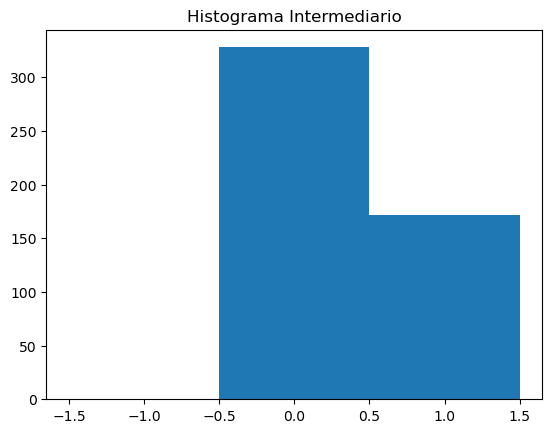

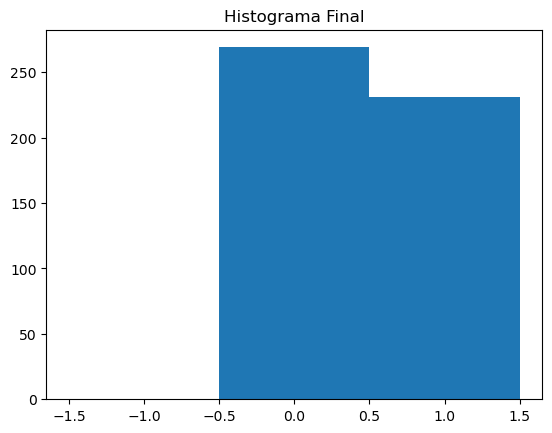

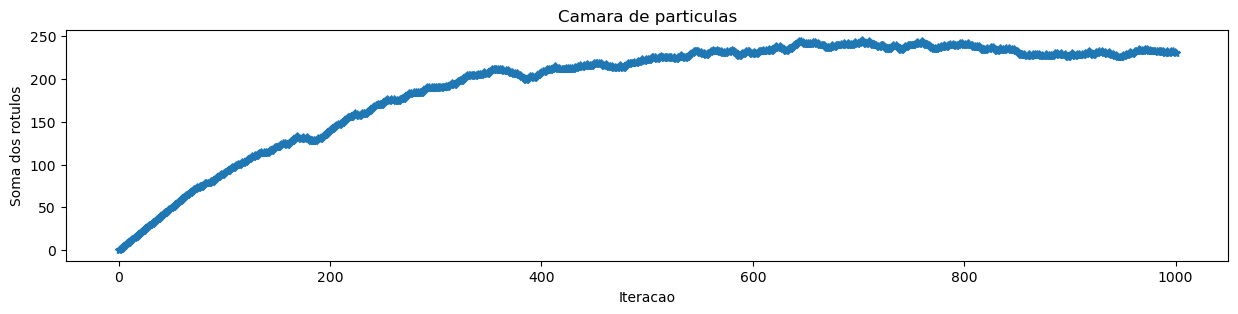

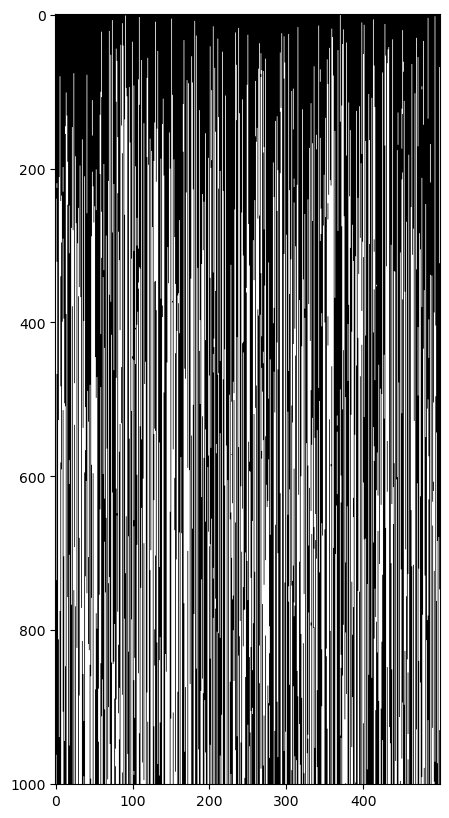

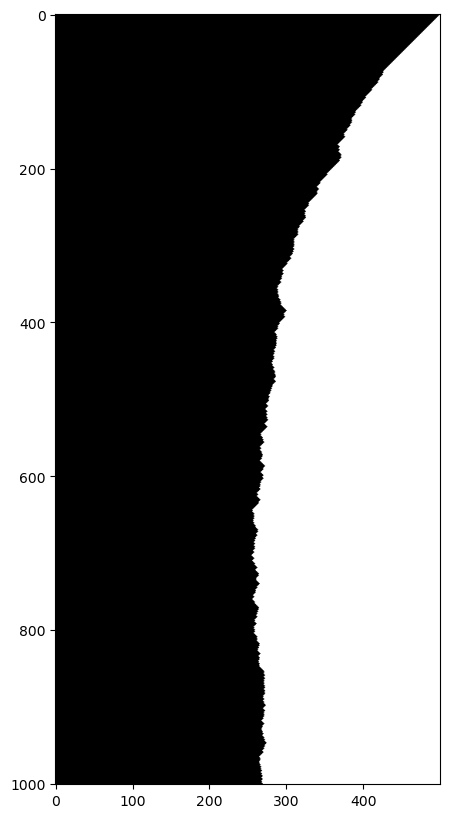

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def main():
  M = 500
  N = 1000
  v = np.zeros(M)

  plt.hist(v, bins=[-1, 0,1,2], align='left')
  plt.title('Histograma inicial')
  plt.show()

  vTrajetoria = np.copy(v)
  #print(v)
  for i in range(N):
    muda = np.random.randint(low=0, high=M)
    v[muda] = 0 if v[muda] == 1 else 1
    vTrajetoria = np.vstack((vTrajetoria,v))


  plt.hist(vTrajetoria[int(N/4),:], bins=[-1, 0,1,2], align='left')
  plt.title('Histograma Intermediario')
  plt.show()

  plt.hist(vTrajetoria[N-1,:], bins=[-1, 0,1,2], align='left')
  plt.title('Histograma Final')
  plt.show()

  soma = np.sum(vTrajetoria, axis = 1)

  plt.figure(figsize=(15,3))
  plt.plot(soma, '*') 
  plt.title("Camara de particulas");
  plt.xlabel('Iteracao')
  plt.ylabel('Soma dos rotulos')
  plt.show()

  plt.figure(figsize=(10,10))
  plt.imshow(vTrajetoria, cmap='gray') 
  plt.show()

  vTrajSort = np.sort(vTrajetoria, axis=1)

  plt.figure(figsize=(10,10))
  plt.imshow(vTrajSort, cmap='gray') 
  plt.show()

main()


### Distribuição normal

Assuma que as partículas são sorteadas usando uma distribuição normal com média $M / 2$ e desvio padrão arbitrário $\sigma$ sobre  todas. Faça testes com $\sigma$ pequeno, médio e grande.

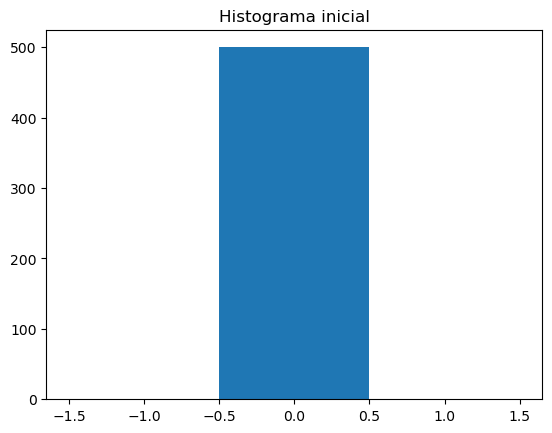

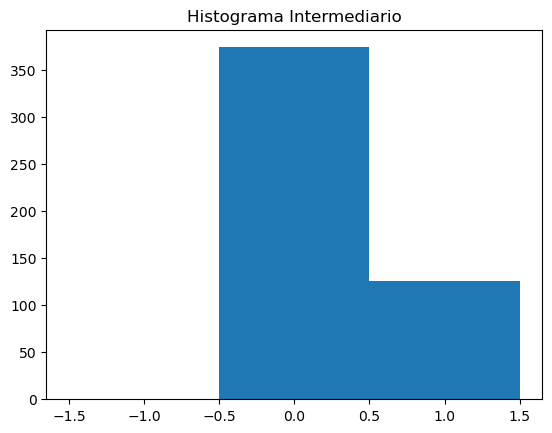

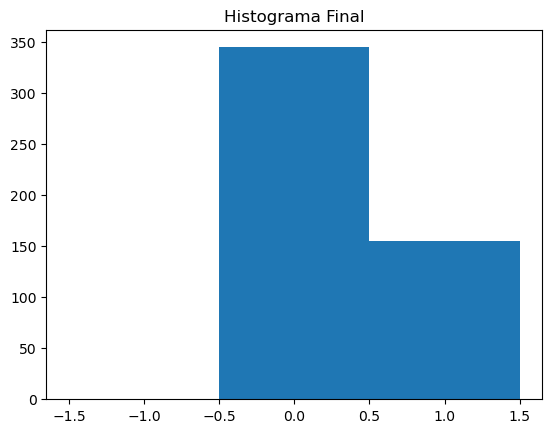

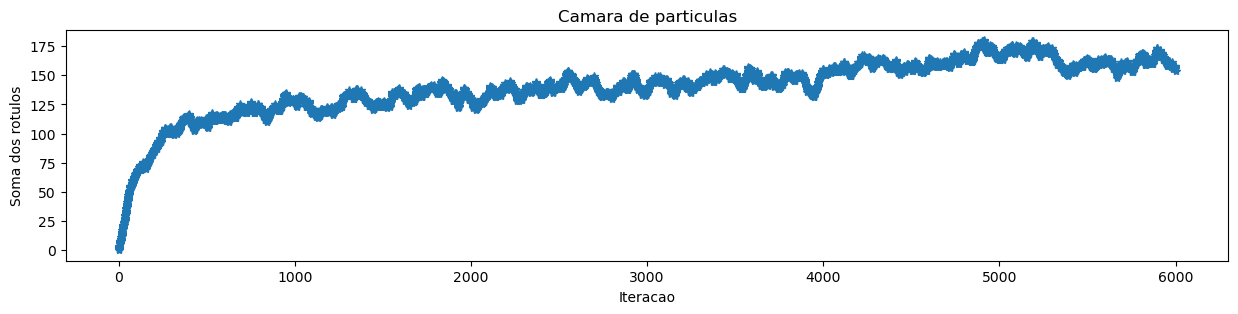

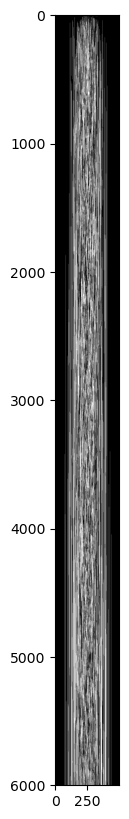

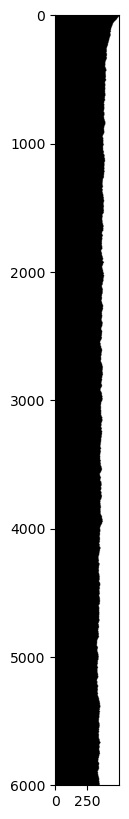

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def main():
  M = 500
  N = 6000
  sd = 50;
  v = np.zeros(M)

  plt.hist(v, bins=[-1, 0,1,2], align='left')
  plt.title('Histograma inicial')
  plt.show()

  vTrajetoria = np.copy(v)
  #print(v)
  for i in range(N):
    muda = round(np.random.normal(M/2, sd))
    v[muda] = 0 if v[muda] == 1 else 1
    vTrajetoria = np.vstack((vTrajetoria,v))


  plt.hist(vTrajetoria[int(N/4),:], bins=[-1, 0,1,2], align='left')
  plt.title('Histograma Intermediario')
  plt.show()

  plt.hist(vTrajetoria[N-1,:], bins=[-1, 0,1,2], align='left')
  plt.title('Histograma Final')
  plt.show()

  soma = np.sum(vTrajetoria, axis = 1)

  plt.figure(figsize=(15,3))
  plt.plot(soma, '*') 
  plt.title("Camara de particulas");
  plt.xlabel('Iteracao')
  plt.ylabel('Soma dos rotulos')
  plt.show()

  plt.figure(figsize=(10,10))
  plt.imshow(vTrajetoria, cmap='gray') 
  plt.show()

  vTrajSort = np.sort(vTrajetoria, axis=1)

  plt.figure(figsize=(10,10))
  plt.imshow(vTrajSort, cmap='gray') 
  plt.show()

main()


### Distribuição normal com controle na porta

Assuma que as partículas são sorteadas usando uma distribuição normal com média $M / 2$ e desvio padrão arbitrário $\sigma$ sobre  todas. Além disso, a partícula só muda de câmara se seu índice (posição no vetor de estados) $j$ verificar $j < M/k $, em que $0< k < M$ é uma constante arbitrária. Faça testes com $\sigma$ pequeno, médio e grande e $k = 2, 3, 4$.

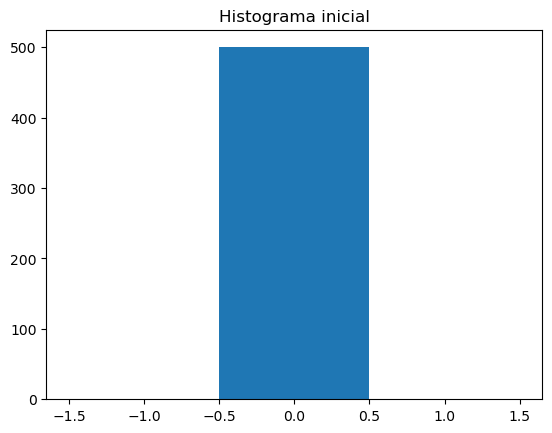

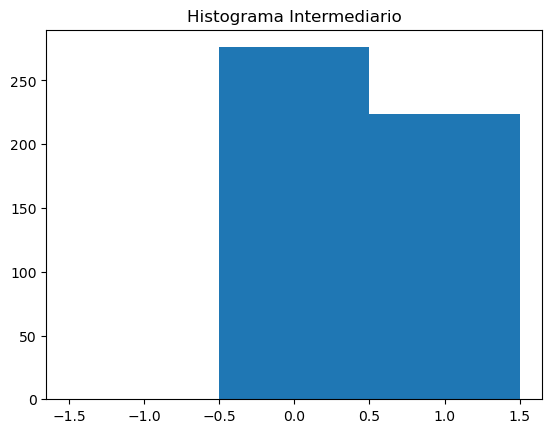

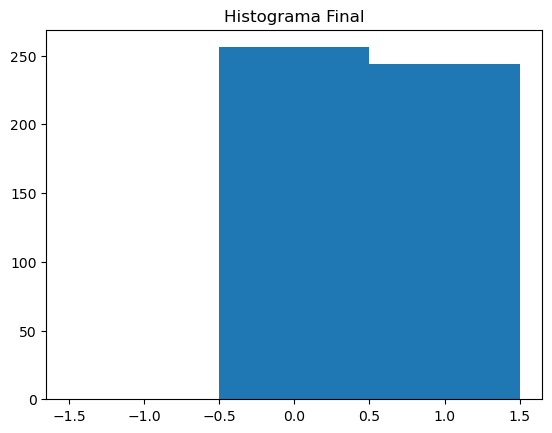

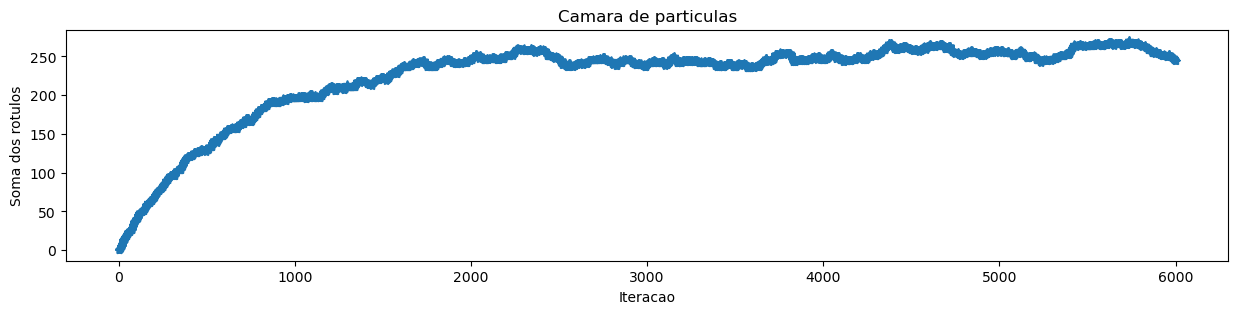

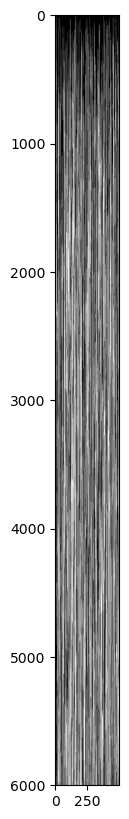

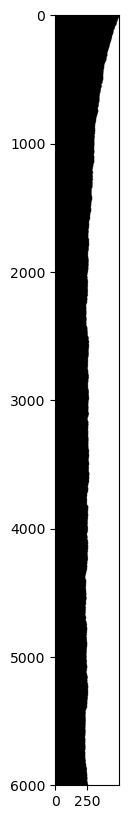

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def main():
  M = 500
  N = 6000
  k = 1
  sd = 500;
  v = np.zeros(M)

  plt.hist(v, bins=[-1, 0,1,2], align='left')
  plt.title('Histograma inicial')
  plt.show()

  vTrajetoria = np.copy(v)
  #print(v)
  for i in range(N):
    muda = round(np.random.normal(M/2, sd))
    if(0 <= muda and muda < M / k):
        v[muda] = 0 if v[muda] == 1 else 1
    vTrajetoria = np.vstack((vTrajetoria,v))


  plt.hist(vTrajetoria[int(N/4),:], bins=[-1, 0,1,2], align='left')
  plt.title('Histograma Intermediario')
  plt.show()

  plt.hist(vTrajetoria[N-1,:], bins=[-1, 0,1,2], align='left')
  plt.title('Histograma Final')
  plt.show()

  soma = np.sum(vTrajetoria, axis = 1)

  plt.figure(figsize=(15,3))
  plt.plot(soma, '*') 
  plt.title("Camara de particulas");
  plt.xlabel('Iteracao')
  plt.ylabel('Soma dos rotulos')
  plt.show()

  plt.figure(figsize=(10,10))
  plt.imshow(vTrajetoria, cmap='gray') 
  plt.show()

  vTrajSort = np.sort(vTrajetoria, axis=1)

  plt.figure(figsize=(10,10))
  plt.imshow(vTrajSort, cmap='gray') 
  plt.show()

main()

## Clusterização de amostras normais